In [2]:
#Imports
#----------------------------------
from binomialTree import *
from parameter_estimations import *
import matplotlib.pyplot as plt
from implied_volatility import *

In [3]:
#Parameters
#----------------------------------

S_0 = 74.09 #Real stock price
K = 85.00 #Real strike price

weeks = 31 # weeks until expiry
days = 5 # days in a regular trading week
holidays = 5 # 19.02, 29.03, 27.05, 19.06, 04.07 (https://www.nyse.com/markets/hours-calendars)
tradingdays = 252

T = (weeks*days - holidays) / tradingdays

R = 0.0522 # (https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_bill_rates&field_tdr_date_value=2024)
r = np.log(1 + R) #continuously compounded interest rate 

market_price = 14.70 #Market price of put option

stock_prices = caluclate_stock_returns() #Stock returns
vol = estimate_volatility(stock_prices) #Historical volatility
sigma = np.sqrt(vol)


# Question 1
---

In [5]:
Ns = np.arange(1, 101)

binom_ests = []
bs_ests = []

n_steps = (weeks*days) - holidays

# loop through number of steps and estimate approximation error
for N in Ns:
    
    # binomial tree
    tree = build_tree(S_0, sigma, T, N)
    value_EU_put = EuropeanPutOption(tree, T, r, K, sigma)
    binom_ests.append(value_EU_put[0,0])

    # black-scholes
    value_EU_put_bs = BlackScholesPut(S_0, T, r, sigma, K, n_steps)
    bs_ests.append(value_EU_put_bs)

differences = np.abs(np.array(binom_ests) - np.array(bs_ests))


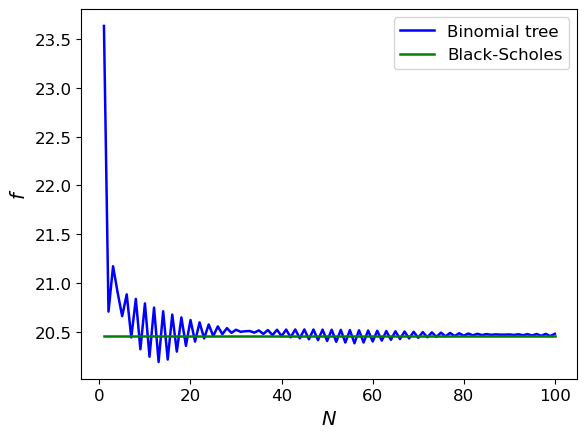

In [6]:
plt.plot(Ns, binom_ests, label='Binomial tree', linestyle='-', linewidth=1.8, color = "b")
plt.plot(Ns, bs_ests, label='Black-Scholes', linestyle='-', linewidth=1.8, color = "green")
plt.xlabel('$N$', fontsize=14, fontweight='bold')
plt.ylabel('$f$', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

# Question 4
-----


* Compute American option price with historical volatility

In [7]:
tree = build_tree(S_0, sigma, T, 500)
price = AmericanPutOption(tree, T, r, K, sigma)[0,0]
print(f"Theoretical price of American option: {price}")

Theoretical price of American option: 20.820395483454977


* Compute American option price with implied volatility

In [8]:
iterations = 100
implied_volatility, theoretical_prices = compute_implied_volatility(tree, T, r, K, sigma, market_price,iterations)
print(f"Computed implied volatility: {implied_volatility}")

Computed implied volatility: 0.09117081756462458


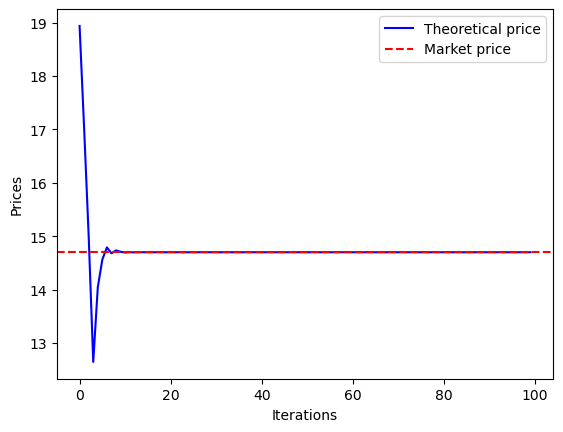

In [9]:

plt.plot(np.arange(0,iterations), theoretical_prices, label = "Theoretical price" , color = "b")
plt.axhline(market_price, linestyle = "--", label = "Market price", color = "red")
plt.xlabel("Iterations")
plt.ylabel("Prices")
plt.legend()


In [10]:
#create_implied_volatility_curve()